<a href="https://colab.research.google.com/github/SatyamRaj1/sorting-Doubly-Link-List/blob/main/Random_forest_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl


Assigning and Declaring

In [ ]:
import seaborn as seb
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets 
from sklearn.model_selection import train_test_split as tts
import seaborn
from sklearn import metrics

In [ ]:
iris=datasets.load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#print(df)
print("columns",df.columns)
#filling none values by mean
df['sepal length (cm)']=df['sepal length (cm)'].fillna(df['sepal length (cm)'].mean())
df['sepal width (cm)']=df['sepal width (cm)'].fillna(df['sepal width (cm)'].mean())
df['petal length (cm)']=df['petal length (cm)'].fillna(df['petal length (cm)'].mean())
df['petal width (cm)']=df['petal width (cm)'].fillna(df['petal width (cm)'].mean())
df['target']=df['target'].fillna(df['target'].mean())
x=df.iloc[:,0:4]
y=df.iloc[:,4]
'''x=iris.data
y=iris.target'''
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=4)
print("X",'\n',x.head(),'\n')
print("y",'\n',y.head(),'\n')
print(x.shape,y.shape)
classes=['Iris Setosa','Iris Versicolour','Iris Virginica']
print(df.info())

columns Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
X 
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 

y 
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64 

(150, 4) (150,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   peta

EDA.  
SEABORN CORRELATION - used for feature selection. M1 for feature selection

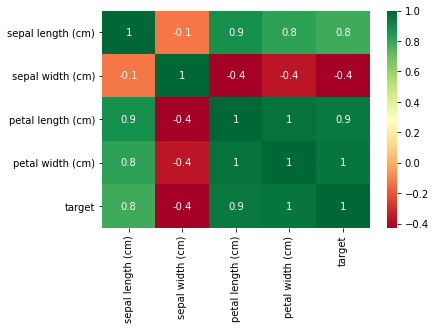

In [ ]:
seaborn.heatmap(df.corr(),annot= True,fmt='.1g',cmap='RdYlGn')

from this we can observe that target is least related to sepal width (with 0.4, -ve show that incresing it will decrese target so are reversaly related by 0.4) and most to petal width  
**Note 0.4 is a significant number so acc may decrease**

Scattering Graph b/w sepal width (cm) and target

Text(0, 0.5, 'target')

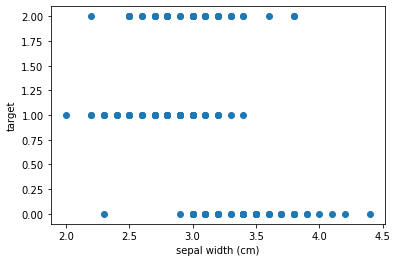

In [ ]:
mpl.scatter(df['sepal width (cm)'],y)
mpl.xlabel('sepal width (cm)')
mpl.ylabel('target')


b/w petal width (cm) and target

Text(0, 0.5, 'target')

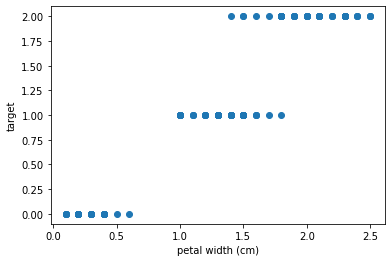

In [ ]:
mpl.scatter(df['petal width (cm)'],y)
mpl.xlabel('petal width (cm)')
mpl.ylabel('target')


SelectKBest feature engineering method using chi - squared statical test

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
bestf=SelectKBest(score_func=chi2, k=3)  #selecting best 3 using chi2
fit=bestf.fit(x,y)
a=pd.DataFrame({"score":fit.scores_,
                "columns":x.columns})
print(a)


        score            columns
0   10.817821  sepal length (cm)
1    3.710728   sepal width (cm)
2  116.312613  petal length (cm)
3   67.048360   petal width (cm)


Model- Random Forest Regressor

In [ ]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
print(model)
pred=model.predict(x_test)  #predictions
#print('predictions:',pred)
#print(np. array(y_test))  #to compare with predictions
#print('accuracy:',acc)
mse=metrics.mean_squared_error(y_test,pred)
print("RMSE: ",np.sqrt(mse))
sc=model.score(x_test,y_test)
print('R squared score',sc)
a=y_test.values
fra=pd.DataFrame(data=[pred,a]).T
fra.columns=['predictions','original']
print(fra)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
RMSE:  0.1393078126548065
R squared score 0.9750841654778887
    predictions  original
0          2.00       2.0
1          0.00       0.0
2          2.00       2.0
3          2.00       2.0
4          2.00       2.0
5          1.00       1.0
6          1.63       1.0
7          0.00       0.0
8          0.00       0.0
9          1.58       2.0
10         0.00       0.0
11         0.00       0.0
12         0.00       0.0
13         1.00       1.0
14         1.98       2.0
15         0.00       0.0


Feature Engineering using feature inportance

In [ ]:
imp=model.feature_importances_
df_imp=pd.DataFrame(imp,index=x.columns,columns=['Importance'])
print(df_imp)

                   Importance
sepal length (cm)    0.008105
sepal width (cm)     0.008484
petal length (cm)    0.474393
petal width (cm)     0.509018


**Note** there is an error coming in feature importance (as it is deviating from heatmap and SelectKbest and also it's value is changing if we change random state while dividing data during Test Train Split (type any other no. in random state of test train split and find out other two are same but it is not and also every time gives different when running model).   
**Till now issue didn't resolved**

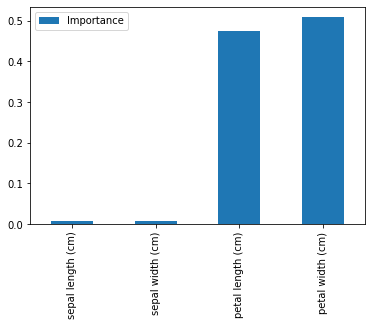

In [ ]:
df_imp.plot(kind="bar")

removing unimp features

In [ ]:
'''
necc=df_imp[((df_imp["Importance"]>0.0085)  | (df_imp["Importance"]<0.008))].index
df_necc=x[necc].copy()          ##would be using if importance feature going good
#print(df_necc)
'''
df_necc=x[['sepal length (cm)','petal length (cm)','petal width (cm)']]
x1_train,x1_test,y1_train,y1_test=tts(df_necc,y,test_size=0.2,random_state=2)
model=RandomForestRegressor()
model.fit(x1_train,y1_train)
print("score after feature eng",model.score(x1_test,y1_test))
pred1=model.predict(x1_test)
print(pred1)
print(np.array(y1_test))

score after feature eng 0.9415480769230771
[0.   0.   1.98 0.   0.   1.52 0.   2.   2.   0.   0.   0.   0.   0.
 1.   1.   0.   1.   2.   1.   1.99 1.   2.   1.   1.   0.   0.   1.93
 0.   2.  ]
[0. 0. 2. 0. 0. 2. 0. 2. 2. 0. 0. 0. 0. 0. 1. 1. 0. 1. 2. 1. 1. 1. 2. 1.
 1. 0. 0. 2. 0. 2.]


Hyperprameter Tuning

declaring all individual hyperparameters.  can add or delete parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#number of trees in random forest
n_est=[x for x in np.arange(start=10,stop=500,step=10)]
#print(ar)
#number of features to be consider at every split
max_f=['auto','sqrt']
#maximum number oflevels
max_d=[2,4]
#min no. of sample required to split a node
min_ss=[2,5]
#min no. of sample required at each leaf node
min_sl=[0,1,2]
#method of selecting samplesfor each training tree
bootstrap=[True,False]

putting them in a grid using dictionary

In [ ]:
rand_grid={'n_estimators':n_est,
           "max_features": max_f,
           'max_depth':max_d,
           #'min_sample_split':min_ss,       ##didn't undersood these both's parameters
           #'min_sample_leaf':min_sl,
           'bootstrap':bootstrap
           }
print(rand_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'bootstrap': [True, False]}


now we will build a model and run all the combination from _est to find best  
gridsearchcv - to run all combinations. can also use RandomizedSearchCV

In [ ]:
model=RandomForestRegressor()
grd=GridSearchCV(estimator=model,param_grid=rand_grid,cv=3,verbose=2,n_jobs=3)
grd.fit(x1_train,y1_train)
grd.best_params_


Fitting 3 folds for each of 392 candidates, totalling 1176 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    4.9s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   43.4s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:  2.9min
[Parallel(n_jobs=3)]: Done 1007 tasks      | elapsed:  4.2min
[Parallel(n_jobs=3)]: Done 1176 out of 1176 | elapsed:  4.8min finished


{'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 10}

In [ ]:
print("R square after hypertunning. ",grd.score(x1_test,y1_test))

R square after hypertunning.  0.9247254092475672


In [ ]:
model


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)